In [7]:
# Import packages

# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets as ds
import seaborn

# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from sklearn.impute import KNNImputer
from time import time

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Lasso, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectFromModel

# Functions for plotting ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

In [8]:
def plot_roc_curve(y_score, y_truth):
    '''
    Plot an ROC curve.
    '''
    # Only take scores for class = 1
    y_score = y_score[:, 1]
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_truth, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [11]:
# preprocessing function

def data_preprocessing(X_train, y_train):
    '''Data preprocessing'''

    # 1. Scaling (standard, min max, robust)

    # Scale the data to be normal
    scaler = preprocessing.StandardScaler()
    # scaler = preprocessing.MinMaxScaler()
    # scaler = preprocessing.RobustScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)

    # # 2. Feature selection/extraction
    # # Create the Recursive Feature Elimination object and compute a cross-validated score.
    # svc = svm.SVC(kernel="linear")

    # # classifications
    # rfecv = feature_selection.RFECV(
    #     estimator=svc, step=1, 
    #     cv=model_selection.StratifiedKFold(4),
    #     scoring='roc_auc')
    # rfecv.fit(X_train_scaled, y_train)

    # # Plot number of features VS. cross-validation scores
    # plt.figure()
    # plt.xlabel("Number of features selected")
    # plt.ylabel("Cross validation score (nb of correct classifications)")
    # plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    # plt.show()
    # print("Optimal number of features : %d" % rfecv.n_features_)

    # # Display the weights and compute error for multiple values for alpha
    # n_alphas = 200
    # alphas = np.logspace(-10, -1, n_alphas)

    # # Construct classifiers
    # coefs = []
    # accuracies = []
    # times = []
    # for a in alphas:
    #     # Fit classifier
    #     clf = RidgeClassifier(alpha=a, fit_intercept=False)
    #     t0 = time()
    #     clf.fit(X_train_scaled, y_train)
    #     duration = time() - t0
    #     y_pred = clf.predict(split_X_test)
    #     message = ("\t Misclassified: %d / %d" % ((split_y_test != y_pred).sum(), split_y_test.shape[0]))
    #     print(message)
        
    #     # Append statistics
    #     accuracy = float((split_y_test != y_pred).sum()) / float(split_y_test.shape[0])
    #     times.append(duration)
    #     accuracies.append(accuracy)
    #     coefs.append(clf.coef_)

    # # Display results

    # # Weights
    # plt.figure()
    # ax = plt.gca()
    # ax.plot(alphas, np.squeeze(coefs))
    # ax.set_xscale('log')
    # ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    # plt.xlabel('alpha')
    # plt.ylabel('weights')
    # plt.title('Ridge coefficients as a function of the regularization')
    # plt.axis('tight')
    # plt.show()

    # # Performance
    # plt.figure()
    # ax = plt.gca()
    # ax.plot(alphas, accuracies)
    # ax.set_xscale('log')
    # ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    # plt.xlabel('alpha')
    # plt.ylabel('accuracies')
    # plt.title('Performance as a function of the regularization')
    # plt.axis('tight')
    # plt.show()

    # # Times
    # plt.figure()
    # ax = plt.gca()
    # ax.plot(alphas, times)
    # ax.set_xscale('log')
    # ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    # plt.xlabel('alpha')
    # plt.ylabel('times (s)')
    # plt.title('Fitting time as a function of the regularization')
    # plt.axis('tight')
    # plt.show()

    # Fit a simple LDA without feature selection and plot an ROC curve
    clf = LDA()
    clf.fit(X_train_scaled, y_train)
    y_score = clf.predict_proba(split_X_test)
    plot_roc_curve(y_score, split_y_test)

    # Now first use the selectfrom model module. Select all features with a weight above the median.
    selector = SelectFromModel(estimator=Lasso(alpha=10**(-10), random_state=42), threshold='median')
    selector.fit(X_train_scaled, y_train)
    n_original = X_train_scaled.shape[1]
    X_train = selector.transform(X_train_scaled)
    X_test = selector.transform(split_X_test)
    n_selected = X_train_scaled.shape[1]
    print(f"Selected {n_selected} from {n_original} features.")

    # Fit the LDA on selected features
    clf = LDA()
    clf.fit(X_train_scaled, y_train)
    y_score = clf.predict_proba(split_X_test)
    plot_roc_curve(y_score, split_y_test)

    # 3. PCA
    n_selected_features = n_selected
    n_samples = len(X_train.index)
    n_components = min(n_samples, n_selected_features)
    pca = decomposition.PCA(n_components)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)

    # print(X_train_pca)
    # X_train_pca.shape

    # # 4. Imputation missing data
    # missing_values=[0.0, 1.0]
    # for elem in missing_values:
    #     imputer = KNNImputer(missing_values=elem, n_neighbors=5, weights='uniform')
    #     X_train_imputed = imputer.fit_transform(X_train_pca)

    # print(X_train_imputed)
    # X_train_imputed.shape

    return X_train_pca

The number of samples: 113
The number of features: 159


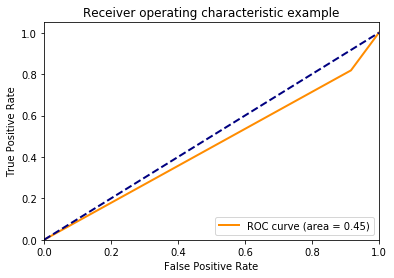

Selected 159 from 159 features.


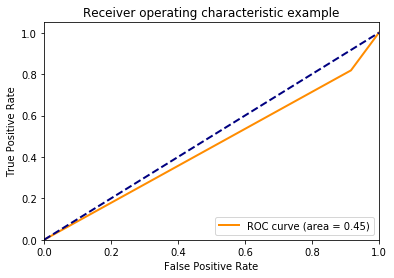

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [12]:
# Data splitting

# # Data imputation (NOG OP VERKEERDE PLEK) --> niet meer nodig
# split_X_train[split_X_train == 1] = np.nan
# split_X_train[split_X_train == 0.0] = np.nan

# for column in split_X_train:
#     print(column)
#     print(split_X_train[column].isnull().sum(axis = 0))

# Data loading
from hn.load_data import load_data
data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of features: {len(data.columns)-1}')
y_labels = data['label']
del data['label']

y = sklearn.preprocessing.label_binarize(y_labels, ['T12', 'T34']) # 0 now stands for T12 and 1 for T34
y = [i[0] for i in y]
y = np.array(y)

sss = model_selection.StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=None)
cv_4fold = model_selection.StratifiedKFold(n_splits=4)

count = 0 
for train_index, test_index in sss.split(data, y):
    train_scores = []
    test_scores = []
    count += 1
    #print(f'Iteration {count}')
    data_array = pd.DataFrame.from_dict(data) #Needed to be able to index this later 
    split_X_train = data_array.iloc[train_index]
    split_y_train = y[train_index]
    split_X_test = data_array.iloc[test_index]
    split_y_test = y[test_index]
    #print(f'Training dataset size {len(split_X_train)}')
    #print(f'Test dataset size {len(split_X_test)}')

    # Loop over the folds
    for training_index, validation_index in cv_4fold.split(split_X_train, split_y_train):
        X_validation = split_X_train.iloc[validation_index]
        y_validation = split_y_train[validation_index]
        X_train = split_X_train.iloc[training_index]
        y_train = split_y_train[training_index]
        #print(f'Validation size in current fold = {len(X_validation)}')
        
        #apply preprocessing
        X_train_pca = data_preprocessing(X_train, y_train)

        #print(X_train)